# Analytics-Vidhya-Black-Friday-Hackathon-Challenge

### With this data, I will try to answer the following questions

What all are the products, that have been purchased the most?

Which product category has been sold the maximum?

Men or Women, who are likely to spend more in Black Friday Sales

Married or Individuals, who spends more?

Which age group has more interest in these type of sales?


In [ ]:
# here we will impor the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline

from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split,GridSearchCV  # to split the data into two parts
from sklearn.model_selection import KFold, cross_val_score  # use for K- fold cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score,average_precision_score, precision_score, confusion_matrix, classification_report

In [2]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  #
import seaborn as sns  #
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,confusion_matrix, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [6]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
full_data = [train, test]
print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB
None


In [7]:
train.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [85]:
#Look at the data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
Age_Encoded                   550068 non-null int64
Price                         550068 non-null int64
dtypes: float64(2), int64(7), object(5)
memory usage: 58.8+ MB


We are able to find three different datatypes as

2 columns with float64

5 columns with int64

5 columns with object

Gender & City_Category are categorical (Nominal) variables, Age column has values in grouped manner. we need to preprocess them, which we can see in the later section

## Data Understanding

#### Unique Values
Lets now explore the unique values in some of the features. Remember there is a total of 537577 entries:

In [54]:
print('Unique Values for Each Feature: \n')
for i in train.columns:
    print(i, ':',train[i].nunique())

Unique Values for Each Feature: 

('User_ID', ':', 5891)
('Product_ID', ':', 3631)
('Gender', ':', 2)
('Age', ':', 7)
('Occupation', ':', 21)
('City_Category', ':', 3)
('Stay_In_Current_City_Years', ':', 5)
('Marital_Status', ':', 2)
('Product_Category_1', ':', 20)
('Product_Category_2', ':', 17)
('Product_Category_3', ':', 15)
('Purchase', ':', 18105)


In [50]:
# Info about products

print('Number of products:',train['Product_ID'].nunique())
print('Number of categories:',train['Product_Category_1'].unique().max())
print('Highest and Lowest Purchase:',
      train['Purchase'].max(),',',train['Purchase'].min())

('Number of products:', 3631)
('Number of categories:', 20)
('Highest and Lowest Purchase:', 23961, ',', 12)


In [51]:
# Info about shoppers
print('Number of shoppers:',train['User_ID'].nunique())
print('Years in city:',train['Stay_In_Current_City_Years'].unique())
print('Age Groups:',train['Age'].unique())

('Number of shoppers:', 5891)
('Years in city:', array(['2', '4+', '3', '1', '0'], dtype=object))
('Age Groups:', array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object))


#### Gender
Lets first find whether the data is uniformly distributed by gender by looking at how many entries belong to each one:

In [55]:
count_m = train[train['Gender']=='M'].count()[0]
count_f = train[train['Gender']=='F'].count()[0]

In [57]:
print('Number of Male Clients:',count_m)
print('Number of Female Clients:',count_f)

('Number of Male Clients:', 414259)
('Number of Female Clients:', 135809)


We can see that the number of male clients recorded exceeds the number of female clients recorded by almost 4 times. For this reason, it will be much more informational to analyze Gender by using ratios instead of counting each entry. Lets see how much each gender spent in regards to eachself:

In [58]:
print('Female Purchases:',round(train[train['Gender']=='F']['Purchase'].sum()/count_f,3))
print('Male Purchases:',round(train[train['Gender']=='M']['Purchase'].sum()/count_m,3))

('Female Purchases:', 8734.0)
('Male Purchases:', 9437.0)


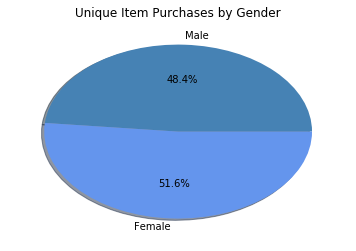

In [59]:
plt.pie(train.groupby('Gender')['Product_ID'].nunique(),labels=['Male','Female'],
       shadow=True, autopct='%1.1f%%',colors=['steelblue','cornflowerblue'])
plt.title('Unique Item Purchases by Gender')
plt.show()

Although almost even, women did purchase a slightly wider array of products than men did. Now, lets analyze the proportions of each gender's purchase in terms of the product categories:

In [61]:
# Individual groupby dataframes for each gender
gb_gender_m = train[train['Gender']=='M'][['Product_Category_1','Gender']].groupby(by='Product_Category_1').count()
gb_gender_f = train[train['Gender']=='F'][['Product_Category_1','Gender']].groupby(by='Product_Category_1').count()

# Concatenate and change column names
cat_bygender = pd.concat([gb_gender_m,gb_gender_f],axis=1)
cat_bygender.columns = ['M ratio','F ratio']

# Adjust to reflect ratios
cat_bygender['M ratio'] = cat_bygender['M ratio']/train[train['Gender']=='M'].count()[0]
cat_bygender['F ratio'] = cat_bygender['F ratio']/train[train['Gender']=='F'].count()[0]

# Create likelihood of one gender to buy over the other
cat_bygender['Likelihood (M/F)'] = cat_bygender['M ratio']/cat_bygender['F ratio']

cat_bygender['Total Ratio'] = cat_bygender['M ratio']+cat_bygender['F ratio']

In [62]:
cat_bygender.sort_values(by='Likelihood (M/F)',ascending=False)

,M ratio,F ratio,Likelihood (M/F),Total Ratio
Product_Category_1,,,,
17,0.001246,0.000457,2.728441,0.001702
18,0.006621,0.002813,2.354068,0.009434
15,0.012659,0.007702,1.643568,0.020361
9,0.000821,0.000515,1.592346,0.001336
1,0.278925,0.182838,1.525531,0.461762
11,0.047188,0.034895,1.352297,0.082082
6,0.038399,0.033569,1.143866,0.071968
10,0.009566,0.008556,1.118084,0.018123
2,0.043948,0.041661,1.054892,0.085610


This table tells us a lot about how likely a type of product is to be bought in regards of gender. For instance, men are almost 3 times as likely to buy an item in category 17, while women are almost 2 times as likely to buy a product in category 14.

### Age
Since as of now, Age values are strings, lets encode each group so they can be represented with an integer value which a machine learning algorithm can understand:

In [63]:
# Encoding the age groups
train['Age_Encoded'] = train['Age'].map({'0-17':0,'18-25':1,
                          '26-35':2,'36-45':3,
                          '46-50':4,'51-55':5,
                          '55+':6})

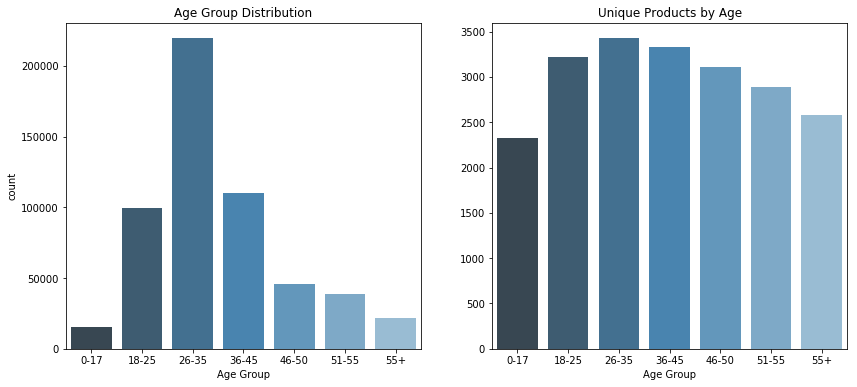

In [65]:
prod_byage = train.groupby('Age').nunique()['Product_ID']

fig,ax = plt.subplots(1,2,figsize=(14,6))
ax = ax.ravel()

sns.countplot(train['Age'].sort_values(),ax=ax[0], palette="Blues_d")
ax[0].set_xlabel('Age Group')
ax[0].set_title('Age Group Distribution')
sns.barplot(x=prod_byage.index,y=prod_byage.values,ax=ax[1], palette="Blues_d")
ax[1].set_xlabel('Age Group')
ax[1].set_title('Unique Products by Age')

plt.show()

It's quite apparent that the largest age group amongst the customers is 26-35. Interestingly, the distribution of product purchase, in terms of quantity, does not vary greatly amongst the age groups. This means that, though the 26-35 age group is the most popular, the other age groups purchase almost as many unique items as them. But does this mean that the amount of money spent amongst the age groups is the same? Let's see...

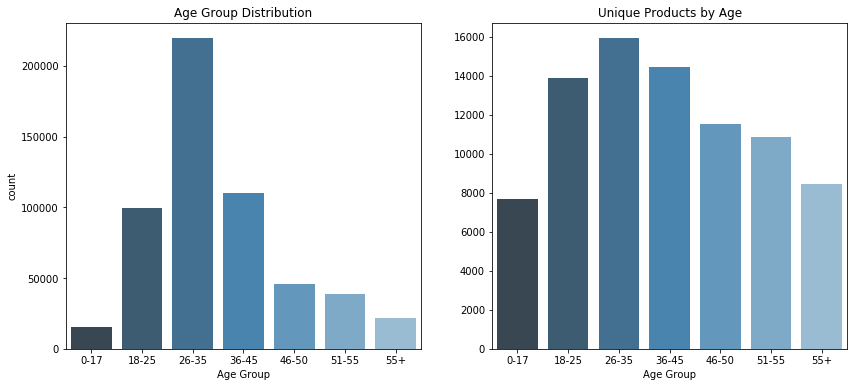

In [82]:
prod_byage = train.groupby('Age').nunique()['Purchase']

fig,ax = plt.subplots(1,2,figsize=(14,6))
ax = ax.ravel()

sns.countplot(train['Age'].sort_values(),ax=ax[0], palette="Blues_d")
ax[0].set_xlabel('Age Group')
ax[0].set_title('Age Group Distribution')
sns.barplot(x=prod_byage.index,y=prod_byage.values,ax=ax[1], palette="Blues_d")
ax[1].set_xlabel('Age Group')
ax[1].set_title('Unique Products by Age')

plt.show()

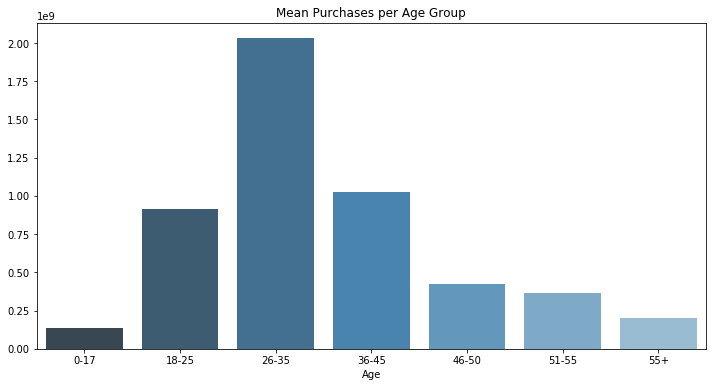

In [66]:
spent_byage = train.groupby(by='Age').sum()['Purchase']
plt.figure(figsize=(12,6))

sns.barplot(x=spent_byage.index,y=spent_byage.values, palette="Blues_d")
plt.title('Mean Purchases per Age Group')
plt.show()

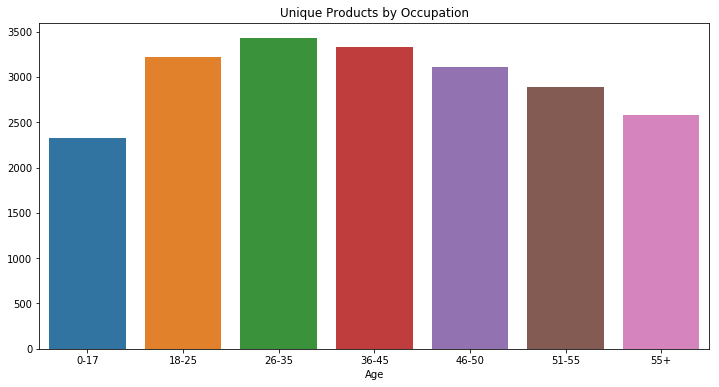

In [71]:
plt.figure(figsize=(12,6))
prod_by_occ = train.groupby(by='Age').nunique()['Product_ID']

sns.barplot(x=prod_by_occ.index,y=prod_by_occ.values)
plt.title('Unique Products by Occupation')
plt.show()

Our data clearly shows that the amount of money made from each age group correlates proportionally with the amount of customers within the age groups. This can be valuable information for the store, as it might want to add more products geared towards this age group in the future, or perhaps work on marketing different items to increase a broader diversity in the age groups of their customers.

### Occupation

This sections draws some insights on our data in terms of the occupation of the customers.

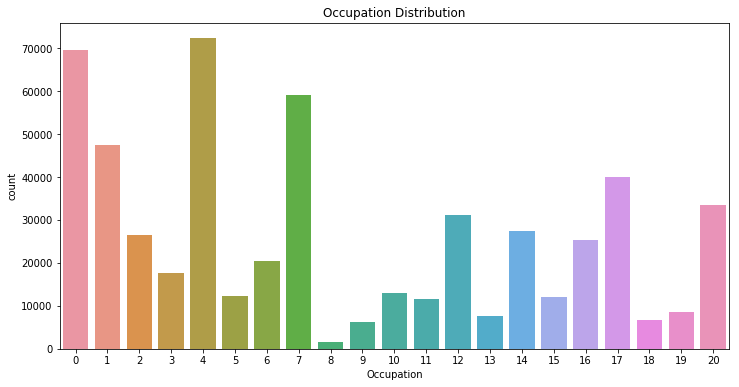

In [68]:
plt.figure(figsize=(12,6))
sns.countplot(train['Occupation'])
plt.title('Occupation Distribution')
plt.show()

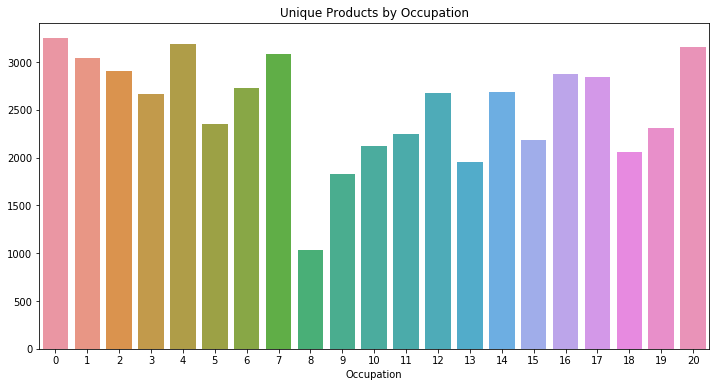

In [69]:
plt.figure(figsize=(12,6))
prod_by_occ = train.groupby(by='Occupation').nunique()['Product_ID']

sns.barplot(x=prod_by_occ.index,y=prod_by_occ.values)
plt.title('Unique Products by Occupation')
plt.show()

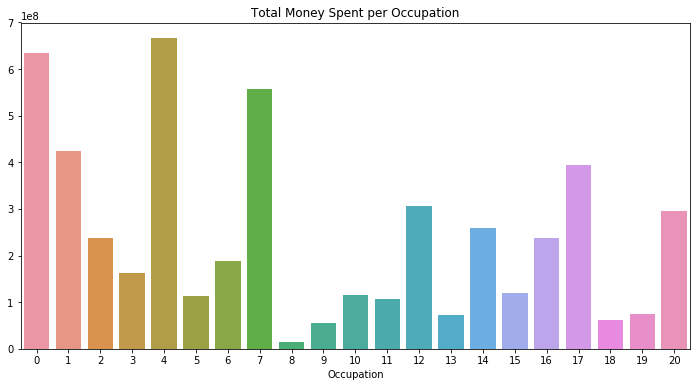

In [73]:
spent_by_occ = train.groupby(by='Occupation').sum()['Purchase']
plt.figure(figsize=(12,6))

sns.barplot(x=spent_by_occ.index,y=spent_by_occ.values)
plt.title('Total Money Spent per Occupation')
plt.show()

Once again, the distribution of the mean amount spent within each occupation appears to mirror the distribution of the amount of people within each occupation. This is fortunate from a data science perspective, as we are not working with odd or outstanding features. Our data, in terms of age and occupation seems to simply make sense.

### Products
Here we explore the products themselves. This is important, as we do not have labeled items in this dataset. Theoretically, a customer could be spending $5,000 on 4 new TVs, or 10,000 pens. This difference matters for stores, as their profits are affected. Since we do not know what the items are, let's explore the categories of the items.

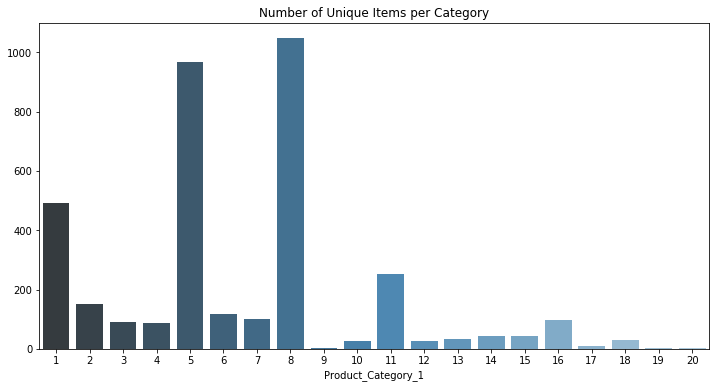

In [74]:
plt.figure(figsize=(12,6))
prod_by_cat = train.groupby('Product_Category_1')['Product_ID'].nunique()

sns.barplot(x=prod_by_cat.index,y=prod_by_cat.values, palette="Blues_d")
plt.title('Number of Unique Items per Category')
plt.show()

Category labels 1, 5, and 8 clearly have the most items within them. This could mean the store is known for that item, or that the category is a broad one.

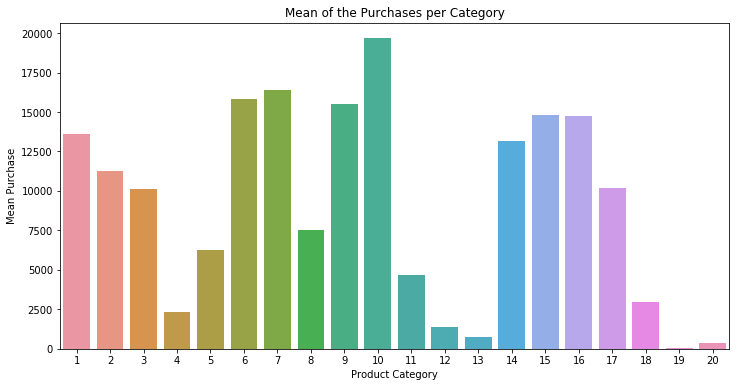

In [75]:
category = []
mean_purchase = []


for i in train['Product_Category_1'].unique():
    category.append(i)
category.sort()

for e in category:
    mean_purchase.append(train[train['Product_Category_1']==e]['Purchase'].mean())

plt.figure(figsize=(12,6))

sns.barplot(x=category,y=mean_purchase)
plt.title('Mean of the Purchases per Category')
plt.xlabel('Product Category')
plt.ylabel('Mean Purchase')
plt.show()

Interestingly enough, our most popular categories are not the ones making the most money. This appears to be a big store, and they may be aware of this. Yet this same form of analysis can be used in the case of a smaller store that might not be aware, and it could be very useful.

## Estimate of price and quantity of purchase

</font> Since the Purchases feature alludes to how much a customer paid for an unknown amount of a certain item, let's make a bold assumption that the lowest purchase paid by product is the price of said item:

In [76]:
# Dictionary of product IDs with minimum purchase
prod_prices = train.groupby('Product_ID').min()['Purchase'].to_dict()

Now, the purchase value for each item ID is grouped by what one could asume is the amount of items purchased. Then, the prices and quantities calculated below are an estimate, but it is a very good one:

In [77]:
def find_price(row):
    prod = row['Product_ID']
    
    return prod_prices[prod]

In [78]:
train['Price'] = train.apply(find_price,axis=1)

### Detecting and Treating Missing Values

In [84]:
total_miss = train.isnull().sum()
perc_miss = total_miss/train.isnull().count()*100

missing_data = pd.DataFrame({'Total missing':total_miss,
                            '% missing':perc_miss})

missing_data.sort_values(by='Total missing',
                         ascending=False).head(3)

,% missing,Total missing
Product_Category_3,69.672659,383247
Product_Category_2,31.566643,173638
User_ID,0.000000,0


Since most products will belong to only one category, it makes sense for less products to have a second category, let alone a third one.

,Total,Percent
Product_Category_3,383247,0.696727
Product_Category_2,173638,0.315666
Purchase,0,0.000000
Product_Category_1,0,0.000000
Marital_Status,0,0.000000


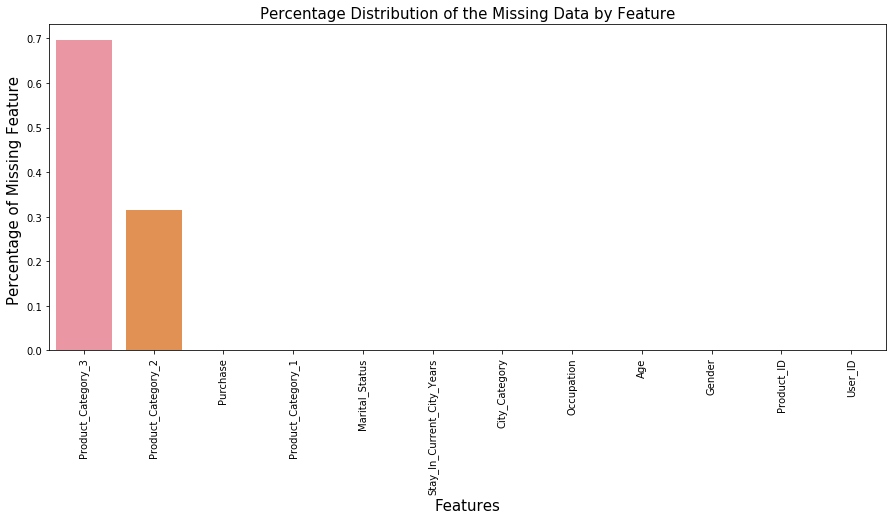

In [12]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percentage of Missing Feature ', fontsize=15)
plt.title('Percentage Distribution of the Missing Data by Feature', fontsize=15)
missing_data.head()

We are able to see more null values in Product_Category_2 and Product_Category_3, let us check the value counts for each category.

In [86]:
#Let us check the values counts on product category trend
train["Product_Category_1"].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

In [87]:
train["Product_Category_2"].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [88]:
train["Product_Category_3"].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [89]:
# Deep copy the original data frame, so that changes made in copy will not impact the original version
train_copy = train.copy()

In [90]:
print ("Shape of Original df:{}".format(train.shape))
print ("Shape of Copy df_copy:{}".format(train_copy.shape))

Shape of Original df:(550068, 14)
Shape of Copy df_copy:(550068, 14)


Now let us drop the Nan values in the copied dataframe to see how much data loss we have

In [91]:
train_copy.dropna(inplace=True)

In [92]:
print ("Shape of Original df:{}".format(train.shape))
print ("Shape of Copy df_copy:{}".format(train_copy.shape))

Shape of Original df:(550068, 14)
Shape of Copy df_copy:(166821, 14)


In [93]:
print("Shape of the original data set : {}".format(train.shape))
print("Shape of the NaN removed data set : {}".format(train_copy.shape))

Shape of the original data set : (550068, 14)
Shape of the NaN removed data set : (166821, 14)


In [95]:
#df_copy.dropna().shape[0]/df_copy.shape[0]
print ("Propotion of missing values in Train is :{0:.2f}".format((train.shape[0] - train_copy.shape[0])/train.shape[0]))

Propotion of missing values in Train is :0.00


In [96]:
#Fill na with Zero
train.fillna(0, inplace=True)

In [97]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
Age_Encoded                   0
Price                         0
dtype: int64


There is no NaN values in the dataset, which is ready for further analysis now !!!

In [122]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

In [123]:
#Let us create a function to plot this
def count_plot(dataframe, column_name, title =None, hue = None):
    '''
    Function to plot seaborn count plot
    Input: Dataframe name that has to be plotted, column_name that has to be plotted, title for the graph
    Output: Plot the data as a count plot
    '''
    base_color = sns.color_palette()[0]
    sns.countplot(data = dataframe, x = column_name, hue=hue)
    plt.title(title)
    pass

In [124]:
#let us create an quick & simple bar plot based on pandos plot method
def simple_bar_plot(data, title = None):
    '''
    A simple bar plot based on pandas plot method
    Input: data to be plotted and title for the plot
    Output: the plotled graph
    '''
    data.plot("bar", title = title)
    pass

In [125]:
#Let us create class handler to get the legend displayed in the plot
class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        '''
        Function to display legend for a plot
        Input: legend, tuple string, placement of x and y descent, width and hight, font for the legend
        Output: retuns the text for legend        
        '''
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]

### 1. What all are the products, that have been purchased the most?

In [101]:
#top 10 poducts sold
train["Product_ID"].value_counts(sort=True)[:10]

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
P00184942    1440
P00046742    1438
P00058042    1422
P00145042    1406
P00059442    1406
Name: Product_ID, dtype: int64

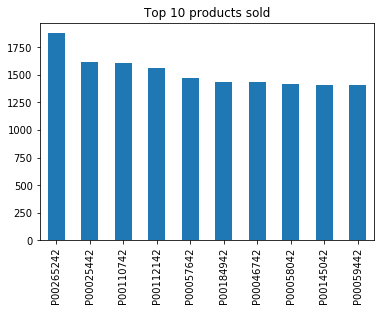

In [118]:
#plotting the top 1- products sold
simple_bar_plot(train["Product_ID"].value_counts(sort=True)[:10], title = "Top 10 products sold")

As we can see above the top 10 products are sold more than 1200 in quantity, we dont have the products description in the data set to get more details of the product. But let us see what all product category that interested the people.

### 2. Which product category has been sold the maximum?

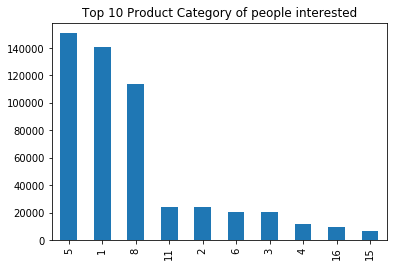

In [119]:
#plotting the product category
simple_bar_plot(train["Product_Category_1"].value_counts(sort=True)[:10], 
                title = "Top 10 Product Category of people interested")


The Product categories 5, 1 & 8 are sold more than 100K. In other hand the categories 11, 2, 6 & 3 have sold upto 20K. we can see a huge gap between the top 3 and rest of the categories. We don't have descriptions of the categories to nail down further. It would have been better if we had description of these categories to understand interest of the people.

### 3. Men or Women, who are likely to spend more in Black Friday Sales?

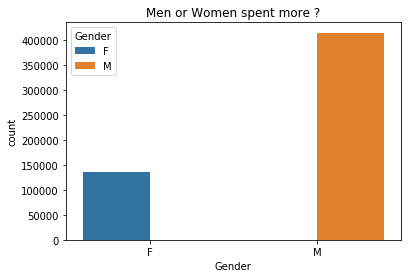

In [120]:
#Check who purchase more
count_plot(train,"Gender","Men or Women spent more ?","Gender")

Hmmmm !!! bit disappointed as my guess was Women !! The plot show that men spent a lot in the black friday sales. But it might be in other way, as women purchased lot and made their spouse pay the bills. Let us deep dive more to understand on marital status of the buyers.

#### 4. Married or Individuals, who spends more?

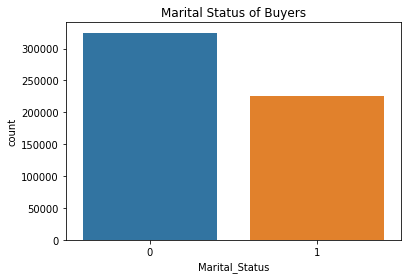

In [105]:
#Let che
count_plot(train,"Marital_Status","Marital Status of Buyers")

The Plot above is with value of 0 & 1, which doesn't make sense. Let us re plot with the same with proper legend.

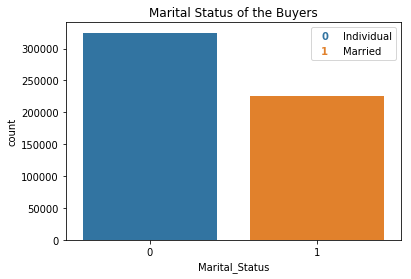

In [126]:
ax=sns.countplot(train. Marital_Status)
#creating the mapping text for the values
handltext = ["0", "1"]
labels = ["Individual", "Married"]
#get the X axis tick labels
t = ax.get_xticklabels()
#map the x values as key and values
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]
ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 
plt.title("Marital Status of the Buyers")
plt.show()


### 5. Which age group has more interest in these type of sales?

In [127]:

#we need to look the value counts of the age column
train.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

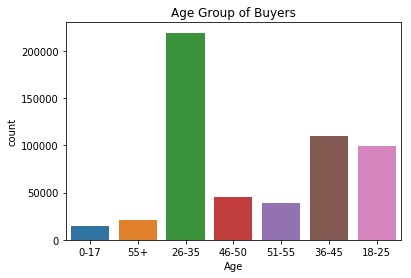

In [128]:
#sns.countplot(df['Age'])
count_plot(train,"Age","Age Group of Buyers")

The Majority of users are from age group of 26-35 Further, I could also check among the age groups, which gender was a majority by adding a hue. And as seen below, more males spent in the sale than females.

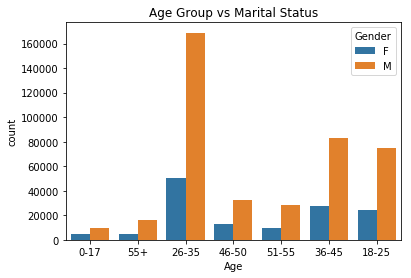

In [110]:
count_plot(train,"Age","Age Group vs Marital Status", "Gender")

One Lastthing, let us check Age group vs Marital status of indvidual along with their Gender. Like Grouping the buyers in age group, also I need to see either it is Male or Female and interested see their marital status.

To achieve this we need to create a new combined feature, combining the Gender & Marital Status. later we can compare that with Age group.

In [112]:
train['combined_G_M'] = train.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(train['combined_G_M'].unique())

['F_0' 'M_0' 'M_1' 'F_1']


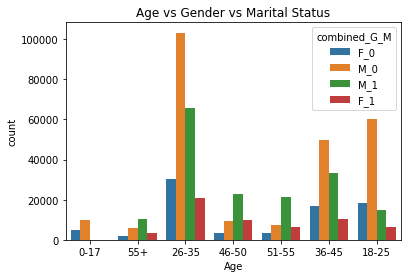

In [113]:
#
count_plot(train,"Age","Age vs Gender vs Marital Status", "combined_G_M")

As we see above, there are no bars for the married in the 0-17 range which makes sense. And then if we look at the 46 and above groups, females are very less. But on the other hand, married males paying in range 46-55 are also comparatively more than married females. 

So it could also imply that though ladies do shop a lot, their spouses are possibly paying for it and hence data reflects that men shopped more. If we had more categorical data defining what kind of products were purchased by men, we could dig in this statement further. However, since in this dataset we don't know if there is a category that implies feminine products/clothes we cannot further explore this case.

## Exploratory Data Analysis

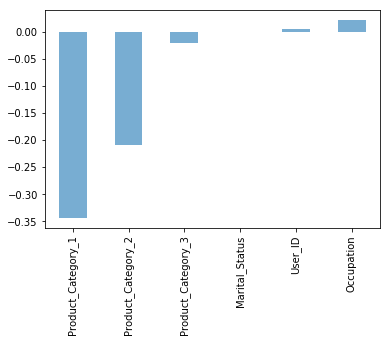

In [17]:
# Observe the Correlation to the Target Variable

tst = train.corr()['Purchase'].copy()
tst = tst.drop('Purchase')
tst.sort_values(inplace=True)
tst.plot(kind='bar', alpha=0.6)

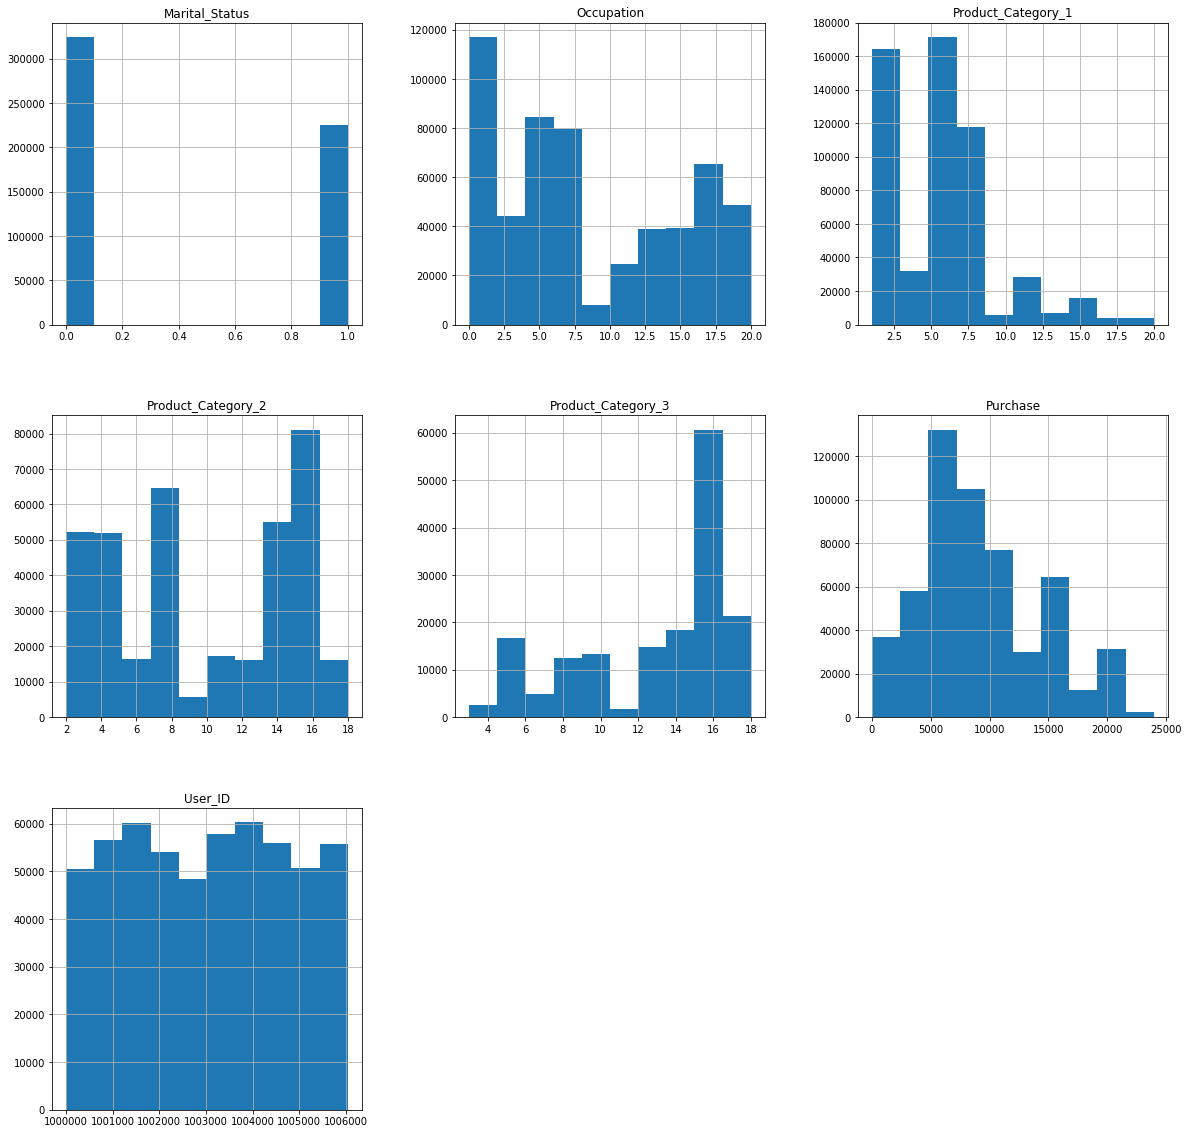

In [18]:
# Plotting the Histogram for each variable

train.hist(figsize = (20, 20))
plt.show()

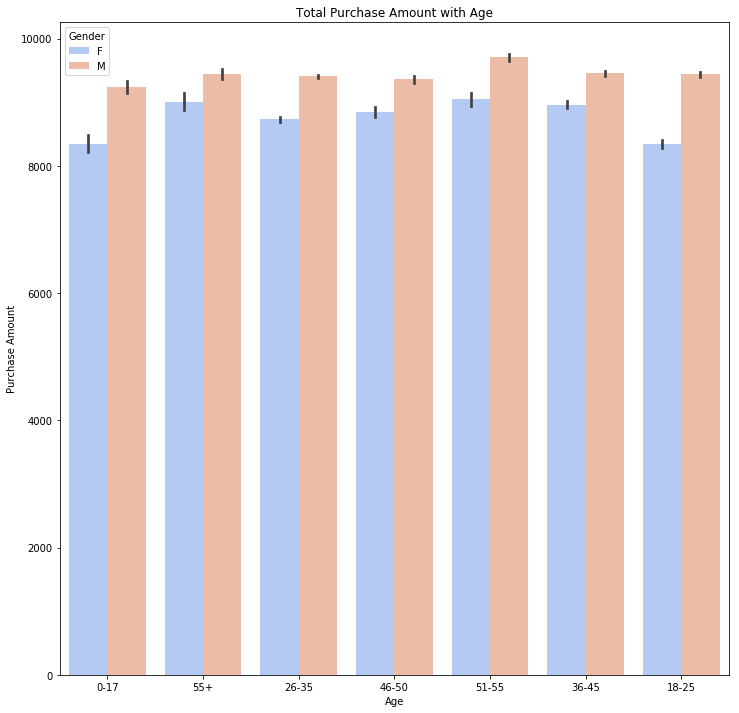

In [22]:
plt.subplots(figsize=(12, 12))
g = sns.barplot(x='Age',y='Purchase',data=train,hue='Gender' ,palette='coolwarm')
g = g.set_ylabel("Purchase Amount")
plt.title('Total Purchase Amount with Age')

plt.show()

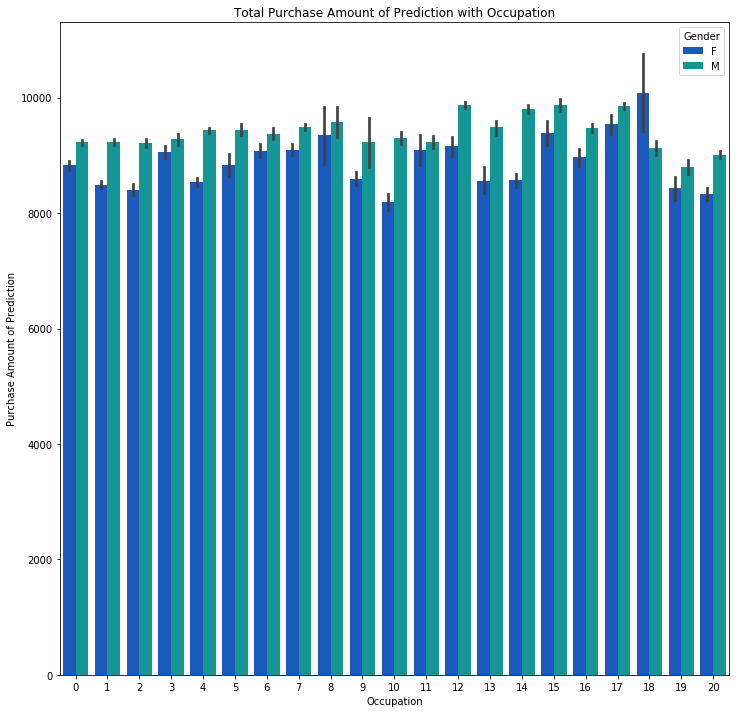

In [24]:
plt.subplots(figsize=(12, 12))
g = sns.barplot(x='Occupation',y='Purchase',data=train,hue='Gender' ,palette='winter')
g = g.set_ylabel("Purchase Amount of Prediction")
plt.title('Total Purchase Amount of Prediction with Occupation')

plt.show()

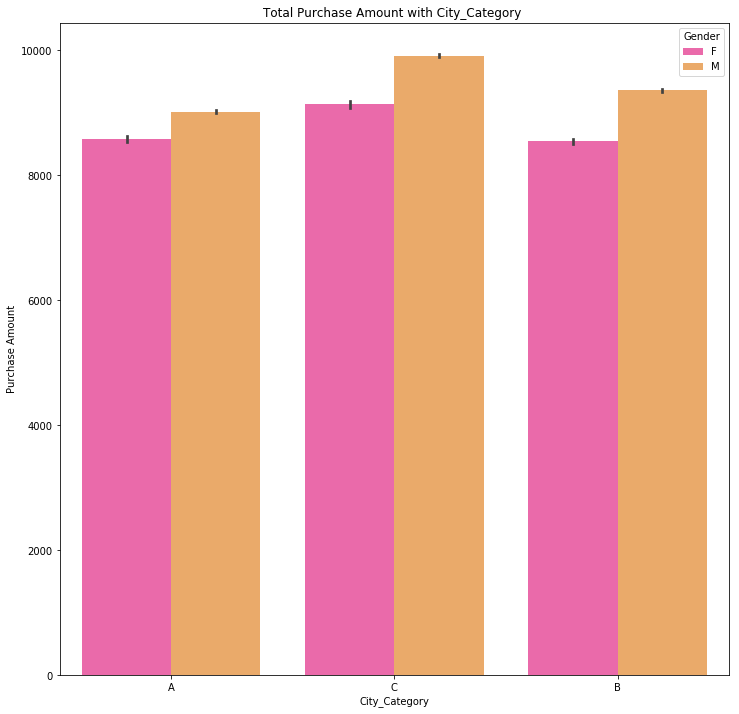

In [25]:
plt.subplots(figsize=(12, 12))
g = sns.barplot(x='City_Category',y='Purchase',data=train,hue='Gender' ,palette='spring')
g = g.set_ylabel("Purchase Amount")
plt.title('Total Purchase Amount with City_Category ')

plt.show()

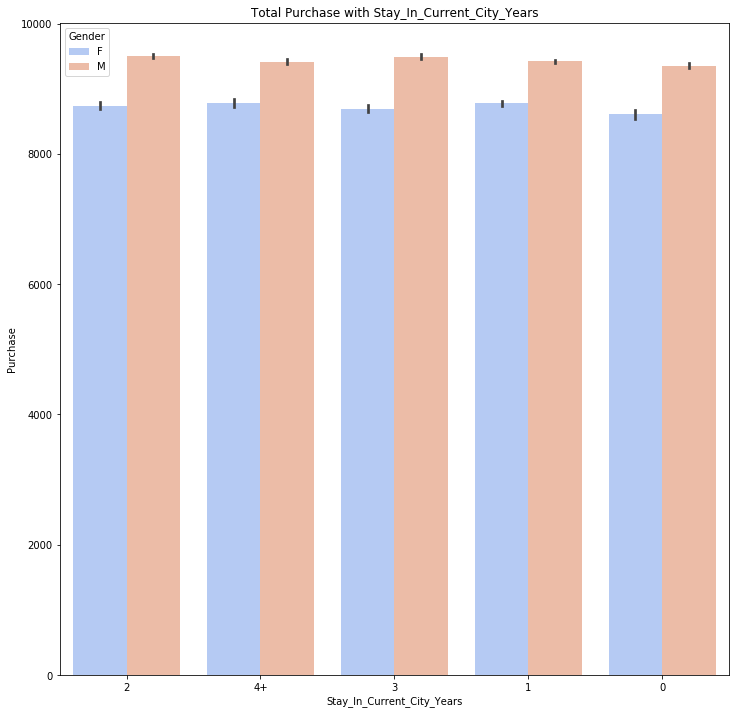

In [27]:
plt.subplots(figsize=(12, 12))
g = sns.barplot(x='Stay_In_Current_City_Years',y='Purchase',data=train,hue='Gender' ,palette='coolwarm')
g = g.set_ylabel("Purchase")
plt.title('Total Purchase with Stay_In_Current_City_Years')

plt.show()

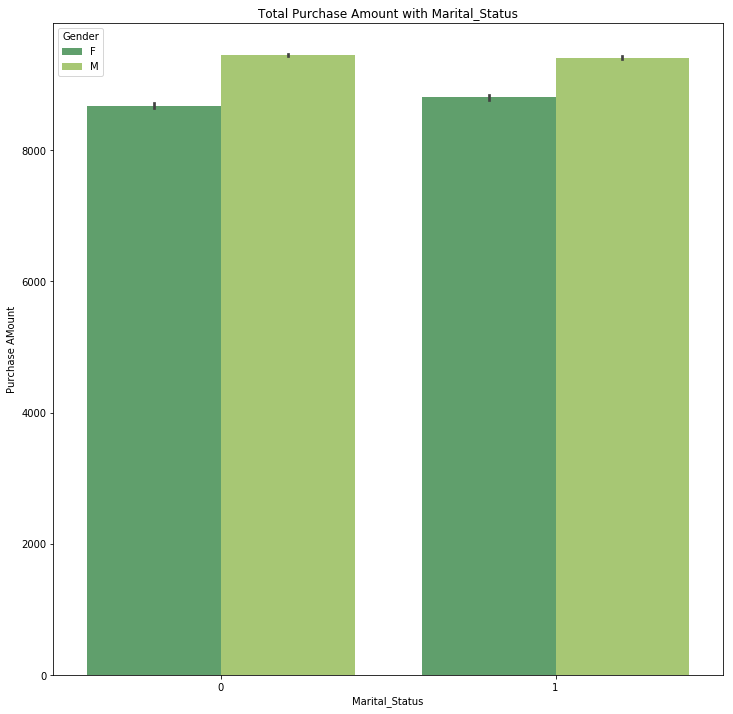

In [28]:
plt.subplots(figsize=(12, 12))
g = sns.barplot(x='Marital_Status',y='Purchase',data=train,hue='Gender' ,palette='summer')
g = g.set_ylabel("Purchase AMount")
plt.title('Total Purchase Amount with Marital_Status')

plt.show()

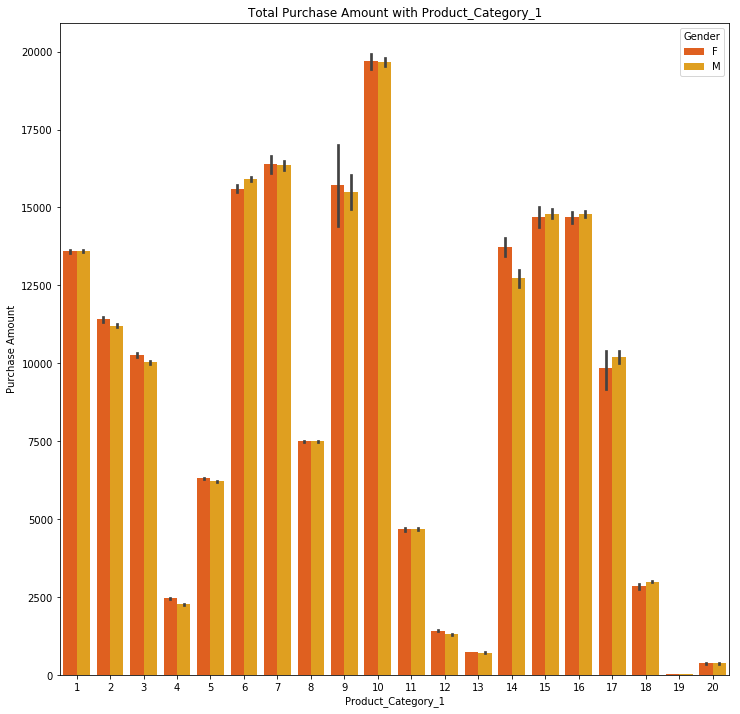

In [30]:
plt.subplots(figsize=(12, 12))
g = sns.barplot(x='Product_Category_1',y='Purchase',data=train,hue='Gender' ,palette='autumn')
g = g.set_ylabel("Purchase Amount")
plt.title('Total Purchase Amount with Product_Category_1')

plt.show()

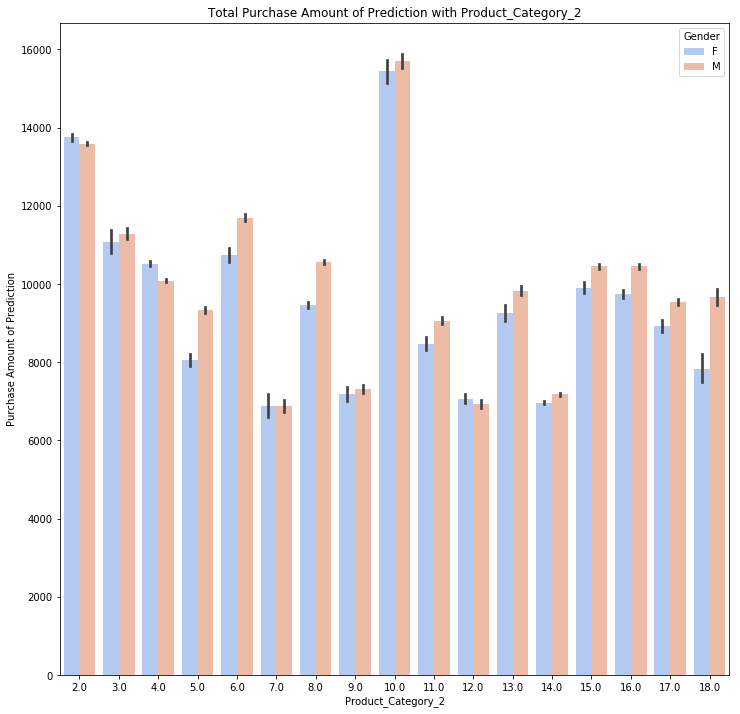

In [32]:
plt.subplots(figsize=(12, 12))
g = sns.barplot(x='Product_Category_2',y='Purchase',data=train,hue='Gender' ,palette='coolwarm')
g = g.set_ylabel("Purchase Amount of Prediction")
plt.title('Total Purchase Amount of Prediction with Product_Category_2')

plt.show()

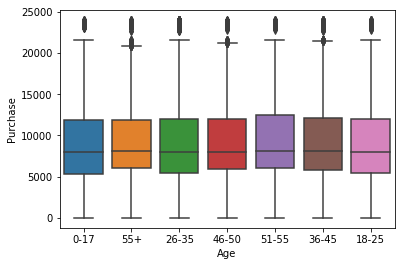

In [33]:
sns.boxplot(x='Age',y='Purchase',data=train)

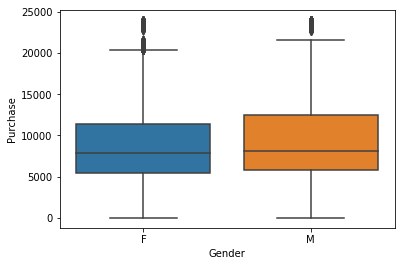

In [34]:
sns.boxplot(x='Gender',y='Purchase',data=train)

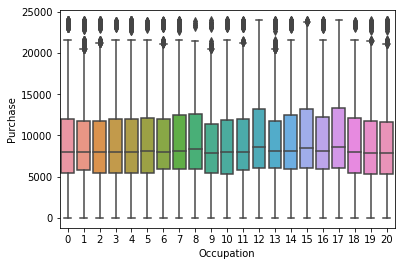

In [35]:
sns.boxplot(x='Occupation',y='Purchase',data=train)

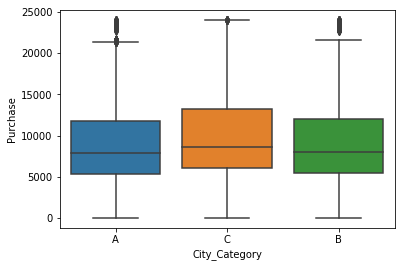

In [36]:
sns.boxplot(x='City_Category',y='Purchase',data=train)

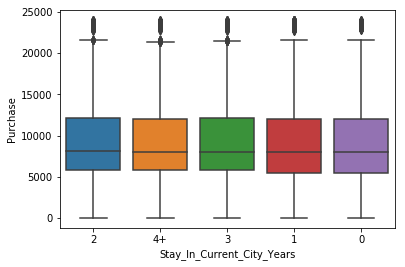

In [37]:
sns.boxplot(x='Stay_In_Current_City_Years',y='Purchase',data=train)

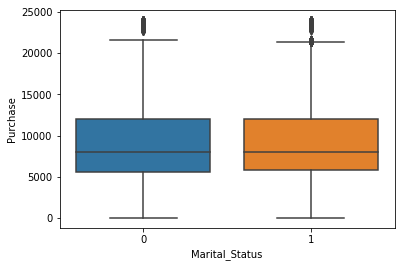

In [38]:
sns.boxplot(x='Marital_Status',y='Purchase',data=train)

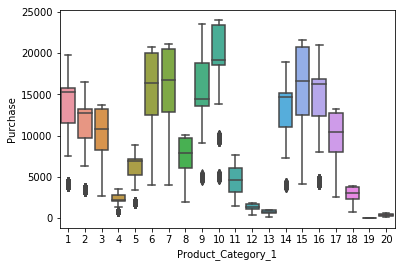

In [39]:
sns.boxplot(x='Product_Category_1',y='Purchase',data=train)

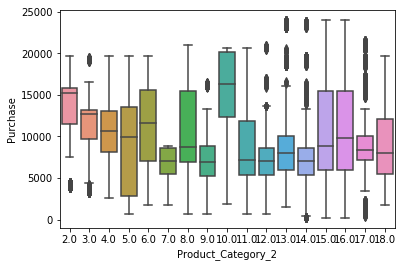

In [40]:
sns.boxplot(x='Product_Category_2',y='Purchase',data=train)

In [44]:
train.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


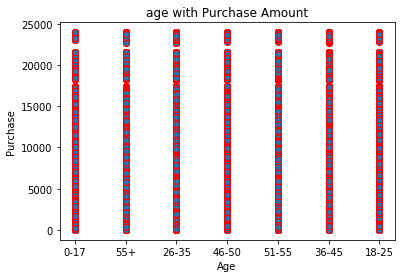

In [46]:
age=train['Age']

pp = train['Purchase']
plt.scatter(age,pp, edgecolors='r')
plt.xlabel('Age')
plt.ylabel('Purchase ')
plt.title('age with Purchase Amount')
plt.show()